In [30]:
import yaml
import glob
import sys
import os
import numpy

import datetime as dt
import pandas as pd
import scipy.io as spi

sys.path.append('../')

In [4]:
# Open config file to get path to data
with open('../config_local.yaml','r') as cf:
    config = yaml.load(cf)

In [13]:
# convert to full path based on version and revision numbers
data_path = os.path.expanduser(config['data_path'])
vers = '01'
rev = '00'
vrdif = 'euvm_temperatures_v'+vers+'r'+rev+'/'
data_path_vr = os.path.join(data_path,vrdif)

In [18]:
alleuvmT = glob.glob(data_path_vr+'*')

In [88]:
def sav2df(sav,orbno,inout):
    # Make DataFrame
    tdf_init = pd.DataFrame(sav['temp'],columns=['alt_temp','temp']) #init
    tdf_init['pressure'] = sav['pressure'] # Add columns
    tdf_init['lat'] = sav['location_info'][0][1]
    tdf_init['lon'] = sav['location_info'][0][2]
    tdf_init['lst'] = sav['location_info'][0][3]
    tdf_init['unixtime'] = sav['location_info'][0][4]
    den_df = pd.DataFrame(sav['density'],columns=['alt_den','density'])
    df = pd.concat([tdf_init,den_df],axis=1,ignore_index=True) # Full DataFrame
    df['orbit'] = [orbno]*len(df)
    df['inout'] = [inout]*len(df)
    return df

In [74]:
def orbIO(fullfilepath):
    filename = os.path.basename(fullfilepath)
    orbio = filename.split('_')[1]
    if 'in' in orbio:
        inout = 'i'
        orbno = int(orbio.split('i')[0])
    elif 'out' in orbio:
        inout = 'o'
        orbno = int(orbio.split('o')[0])
    else:
        inout = np.nan
        orbno = np.nan
    return orbno, inout

In [71]:
pieces = []
for i,efile in enumerate(alleuvmT):
    orbno, inout = orbIO(efile)
    # read in savfile
    savobj = spi.readsav(efile)
    df = sav2df(savobj,orbno,inout)
    pieces.append(df)
alldf = pd.concat(pieces).sort_values('orbit')

In [75]:
alldf['datetime'] = alldf['unixtime'].apply(dt.datetime.utcfromtimestamp)


In [83]:
feb15 = alldf[(alldf['datetime'].dt.year == 2015) & (alldf['datetime'].dt.month == 2)]

In [86]:
feb15i = feb15[feb15['inout'] == 'i']
feb15o = feb15[feb15['inout'] == 'o']

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/masl3485/Desktop/NGIMS_homopause/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


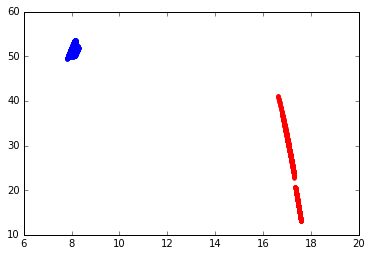

In [95]:
plt.figure()
plt.scatter(feb15i['lst'],feb15i['lat'],c='r',lw=0)
plt.scatter(feb15o['lst'],feb15o['lat'],c='b',lw=0)
plt.show()

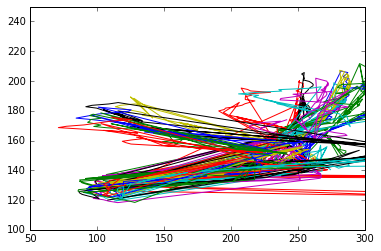

In [105]:
plt.figure()
for orb,orbdf in feb15i.groupby('orbit'):
    plt.plot(orbdf['temp'],orbdf['alt_temp'])
plt.xlim(50,300)
plt.ylim(100,250)
plt.show()

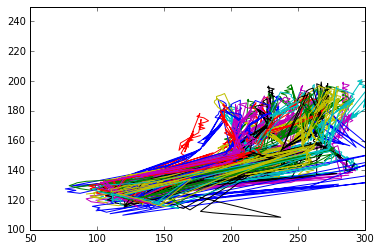

In [106]:
plt.figure()
for orb,orbdf in feb15o.groupby('orbit'):
    plt.plot(orbdf['temp'],orbdf['alt_temp'])
plt.xlim(50,300)
plt.ylim(100,250)
plt.show()

In [119]:
dec16 = alldf[(alldf['datetime'].dt.year == 2016) & (alldf['datetime'].dt.month == 1)]
dec16i = dec16[dec16['inout'] == 'i']
dec16o = dec16[dec16['inout'] == 'o']

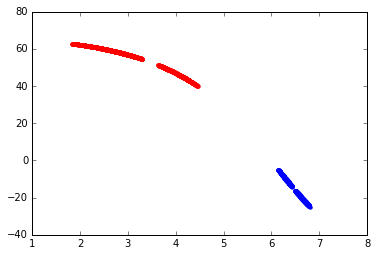

In [120]:
plt.figure()
plt.scatter(dec16i['lst'],dec16i['lat'],c='r',lw=0)
plt.scatter(dec16o['lst'],dec16o['lat'],c='b',lw=0)
plt.show()

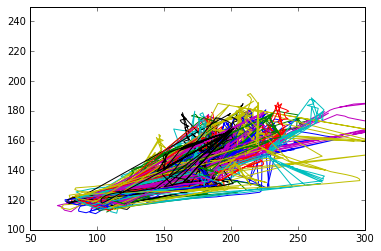

In [121]:
plt.figure()
for orb,orbdf in dec16i.groupby('orbit'):
    plt.plot(orbdf['temp'],orbdf['alt_temp'])
plt.xlim(50,300)
plt.ylim(100,250)
plt.show()

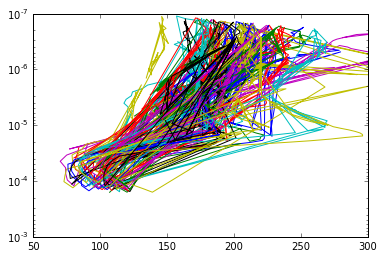

In [129]:
plt.figure()
for orb,orbdf in dec16i.groupby('orbit'):
    plt.plot(orbdf['temp'],orbdf['pressure'])
plt.xlim(50,300)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.show()

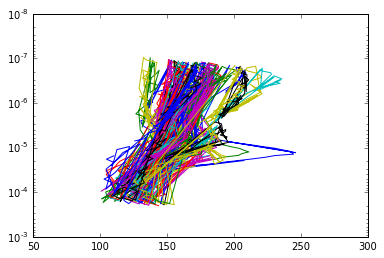

In [128]:
plt.figure()
for orb,orbdf in dec16o.groupby('orbit'):
    plt.plot(orbdf['temp'],orbdf['pressure'])
plt.xlim(50,300)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.show()